#  **Problem Statement :**
The Data Scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product
and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

**Main Goal :** Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

*   **Type of the Problem:** Supervised Learning Problem
*   **Target Variabe:** Item_Outlet_Sales

We will handle this problem in a structured way following the table of content given below:


1.   Problem Statement
2.   Hypothesis Generation
1.   Loading Packages and Data
2.   Data Structure and Content
1.   Exploratory Data Analysis
1.   Univariate Analysis
1.   Bivariate Analysis
2.   Missing Value Treatment
2.   Feature Engineering
2.   Encoding Categorical Variables
1.   Label Encoding
2.   One Hot Encoding
1.   Pre Processing Data
2.   Modeling
1.   Linear Regression
2.   Regularized Linear Regression
1.   Random Forest
2.   XGBoost
1.   Summary



**Hypothesis Generation :**

1. Store Location : Stores located in urban and developed areas should have
   higher sales because of having people with higher income levels.

2. Store Capacity : Stores which are having more capacity of space should have
   higher sales as they act like one-stop-shops and people would prefer getting everything from one place.

3. Frequency of the Product: Products with high frequency will have higher sales as they are being sold very frequently.

4. Item Visibility : The items that are more visible will have higher sales as they attract the customer first rather than other items.

In [140]:
import numpy as np # linear algebra
import pandas as pd # data processing
import math
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from xgboost import XGBRegressor
import warnings
warnings.simplefilter("ignore")

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns


20

In [65]:
# loading the data
train = pd.read_csv("Train.csv")
test  = pd.read_csv("Test.csv")

In [66]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [67]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [68]:
train.shape

(8523, 12)

In [69]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [70]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [71]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Missing Value Treatment :

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


From the above output, it seems like there are some missing values in the columns **Item_Weight**  and  **Outlet_Size** . So first let's confirm with it and after that find out the value counts.

In [73]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [74]:
print(" Outlet_Size :\n", train.Outlet_Size.value_counts(),"\n\n")
print(" Item_Weight :\n", train.Item_Weight.value_counts(),"\n\n")

 Outlet_Size :
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


 Item_Weight :
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 




Since  **Outlet_Size**  is a categorical column, we can replace the null values with it's mode value.

In [75]:
print(" Mode value of Outlet_Size in train data is :",[train['Outlet_Size'].mode().values[0]])
print(" Mode value of Outlet_Size in test data is :",[test['Outlet_Size'].mode().values[0]])

 Mode value of Outlet_Size in train data is : ['Medium']
 Mode value of Outlet_Size in test data is : ['Medium']


In [76]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].dropna().mode().values[0])
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].dropna().mode().values[0])

In [77]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

Text(0.5, 1.0, 'Item_Weight Boxplot')

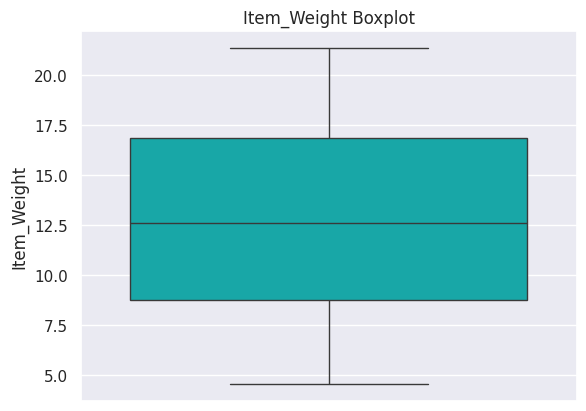

In [78]:
sns.boxplot(data=train['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")

Since  **Item_Weight** is a numerical column and there are no outliers, we can replace the null or missing values with it's mean value.

In [79]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].dropna().mean())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].dropna().mean())

Now, we can confirm that whether we've filled all the missing values successfully or not by using the **.info()** method for both the datasets.

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# **Feature Engineering :**

We can see that the data contains repeating values with different names in **Item_Fat_Content** column.So let's correct them.

 Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64 




<Axes: xlabel='Item_Fat_Content', ylabel='count'>

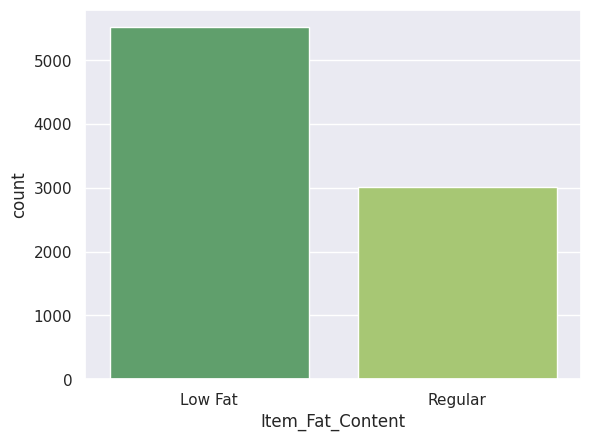

In [82]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat' :'Low Fat',
                                                           'low fat' :"Low Fat",
                                                           'LF'      :"Low Fat",
                                                           'Regular' :'Regular',
                                                           'reg'     :"Regular"
                                                          })

test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'Low Fat' :'Low Fat',
                                                           'low fat' :"Low Fat",
                                                           'LF'      :"Low Fat",
                                                           'Regular' :'Regular',
                                                           'reg'     :"Regular"
                                                          })

print("",train['Item_Fat_Content'].value_counts(),"\n\n")

sns.countplot(x=train['Item_Fat_Content'],palette='summer')

Let's create a new column for **Outlet_Establishment_Year** for getting the amount of established years and will name it as **Outlet_Age**.

In [83]:
train['Outlet_Age'], test['Outlet_Age']= train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

Let's drop the old column **Outlet_Establishment_Year**.

In [84]:
train = train.drop(['Outlet_Establishment_Year'], axis=1)

# **Exploratory Data Analysis**

## Univariate Analysis

In [85]:
numerical_cols = train.select_dtypes(include=['float64','int64']).columns.tolist()
numerical_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Item_Outlet_Sales',
 'Outlet_Age']

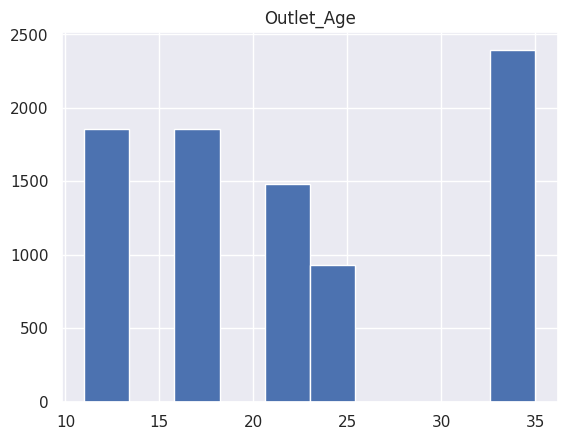

In [86]:
plt.hist(train['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

In [87]:
#list of all the numeric columns
num = train.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  train[num]

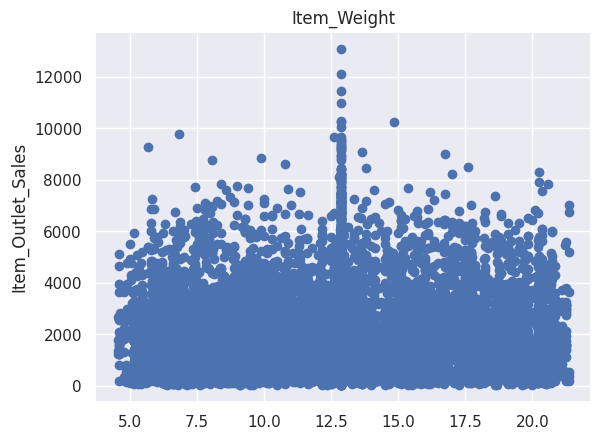

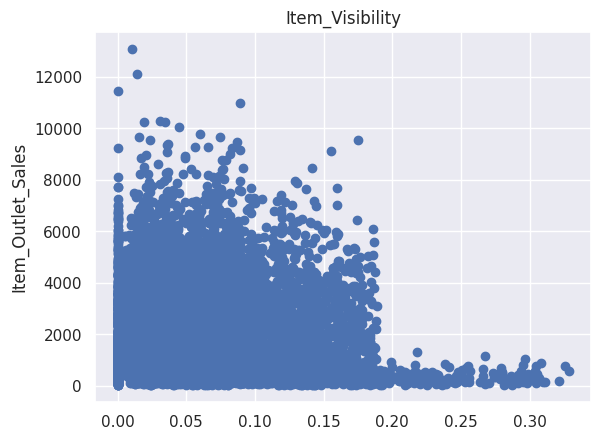

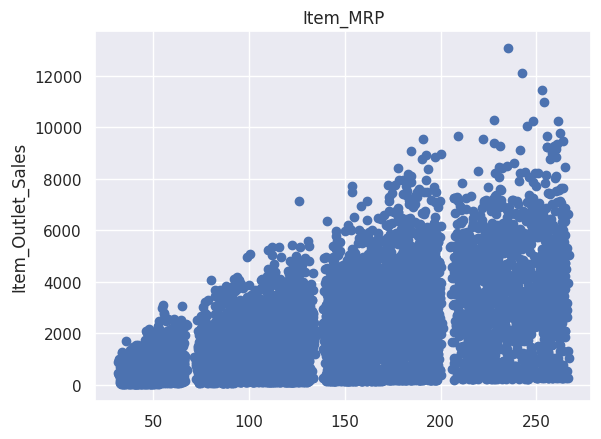

In [88]:
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

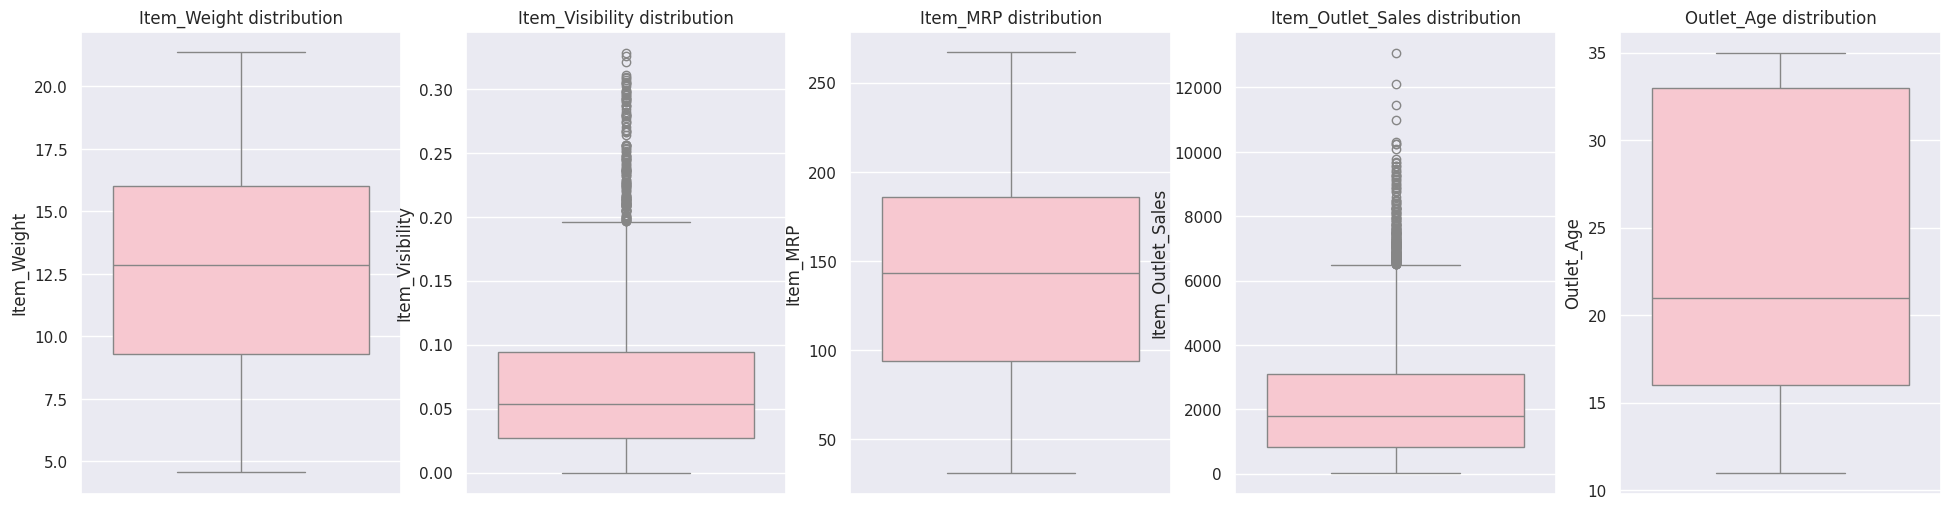

In [90]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(24,6))
for index, col in enumerate(numerical_cols):
    sns.boxplot(data=train, y=col, ax=ax[index],color='pink')
    ax[index].set_title(f'{col} distribution')

In [91]:
categorical_cols = train.select_dtypes(include= ['object']).columns.tolist()
categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Now , let's create countplots for each categorical column.

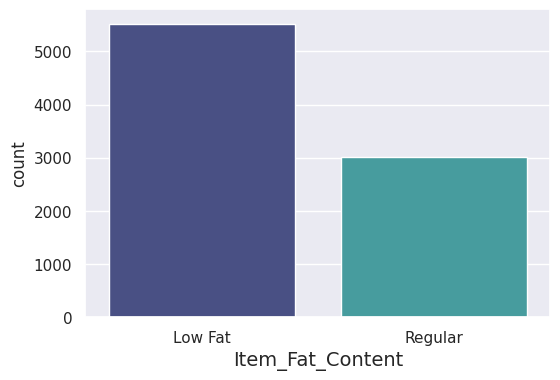

In [92]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=train ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

From the above graph, we can say that the most items sold are **Low Fat** items.

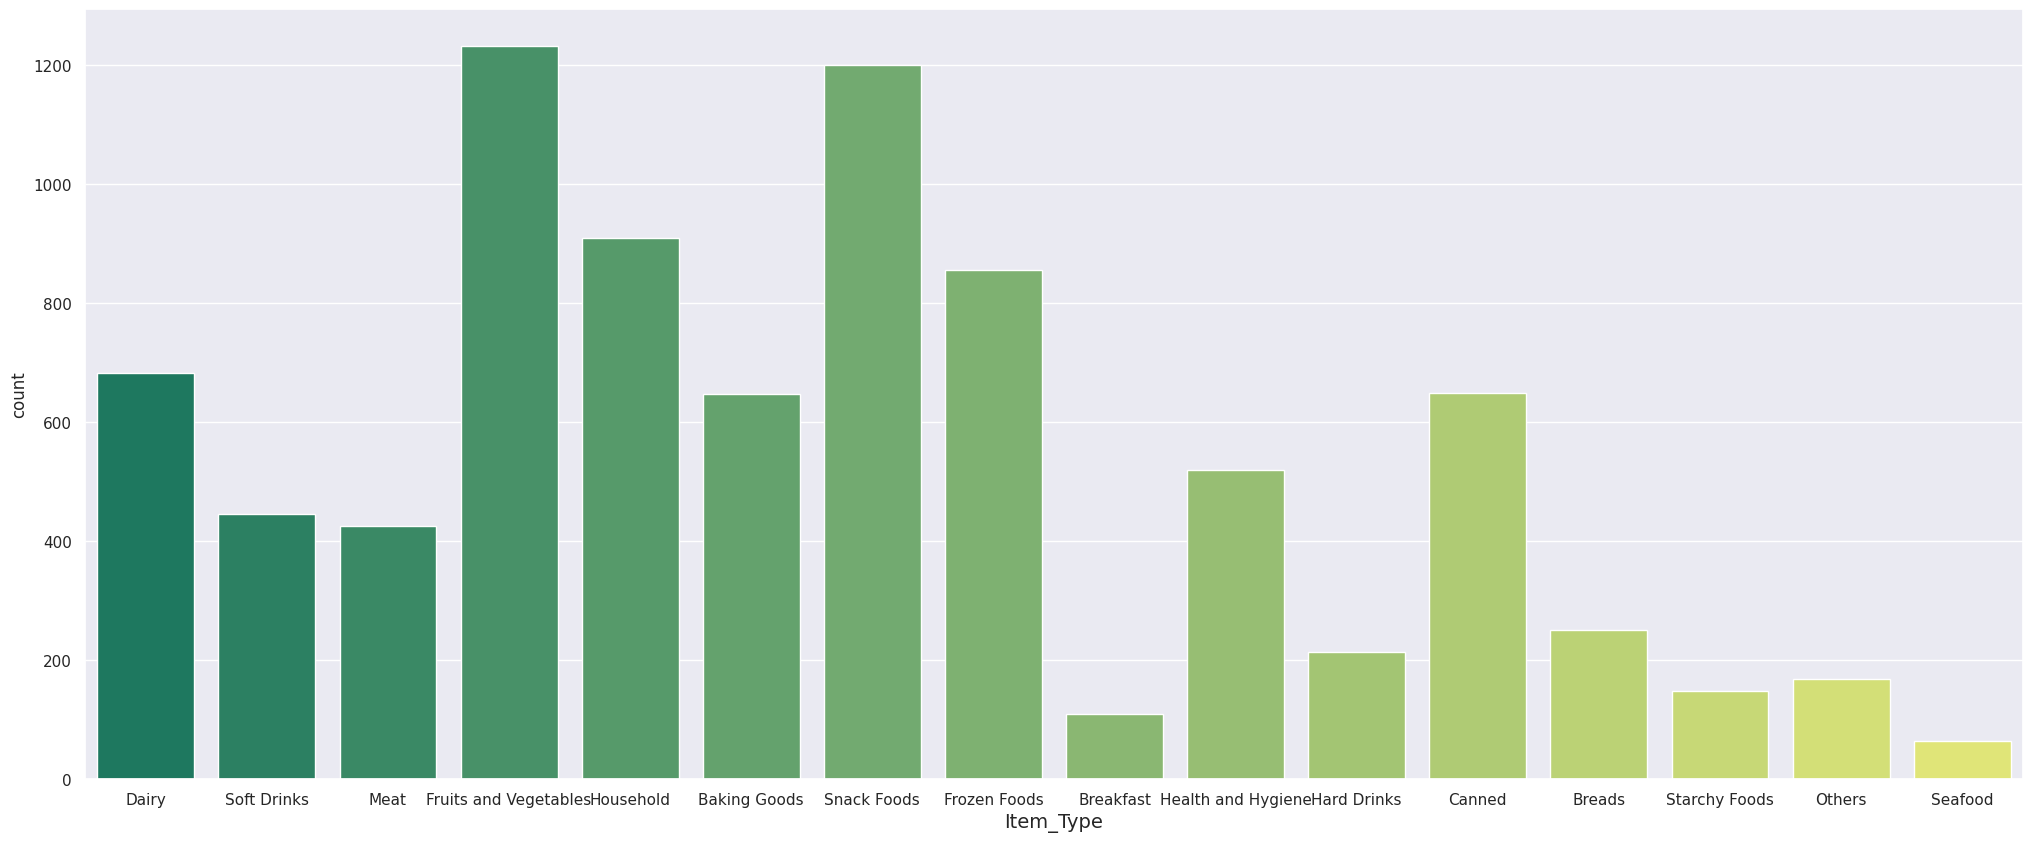

In [93]:
plt.figure(figsize=(25,10))
sns.countplot(x='Item_Type' , data=train ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

The most widely popular items are **Fruits and Vegetables** and **Snack Foods**.

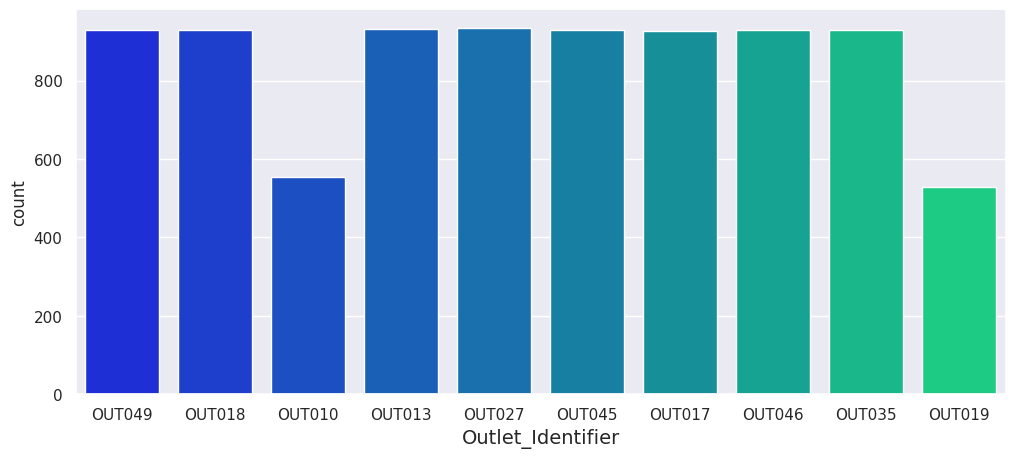

In [94]:
plt.figure(figsize=(12,5))
sns.countplot(x='Outlet_Identifier' , data=train ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

Sold items are ditributed evenly among outlets excluding **OUT010** and **OUT019** that are significanly lower.

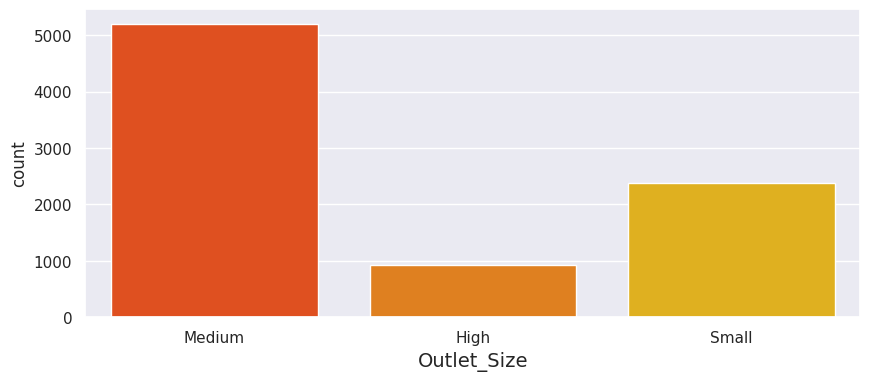

In [95]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=train ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

Outlets are mostly **Medium** sized in our data.

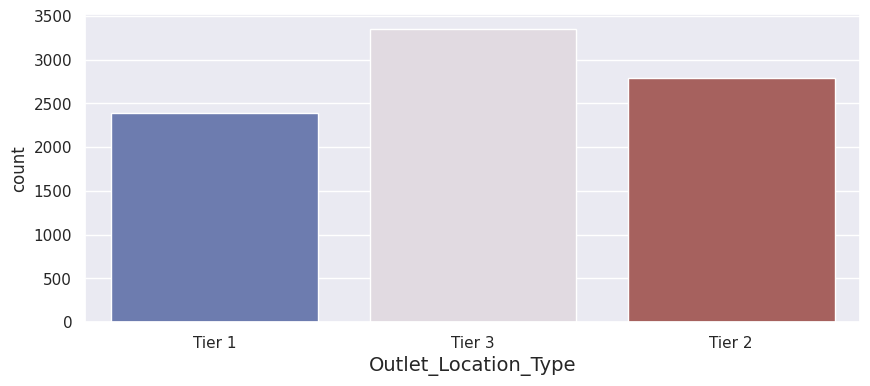

In [96]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=train ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

Most of the outlets are located at **Tier 3** type.

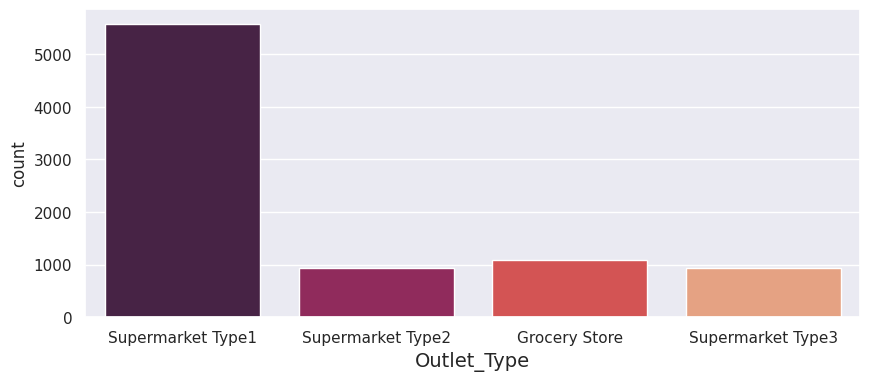

In [97]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=train ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

The wide **Outlet_Type** is *Spermarket Type1*.

# Bivariate Analysis

In [99]:
target_variable = "Item_Outlet_Sales"

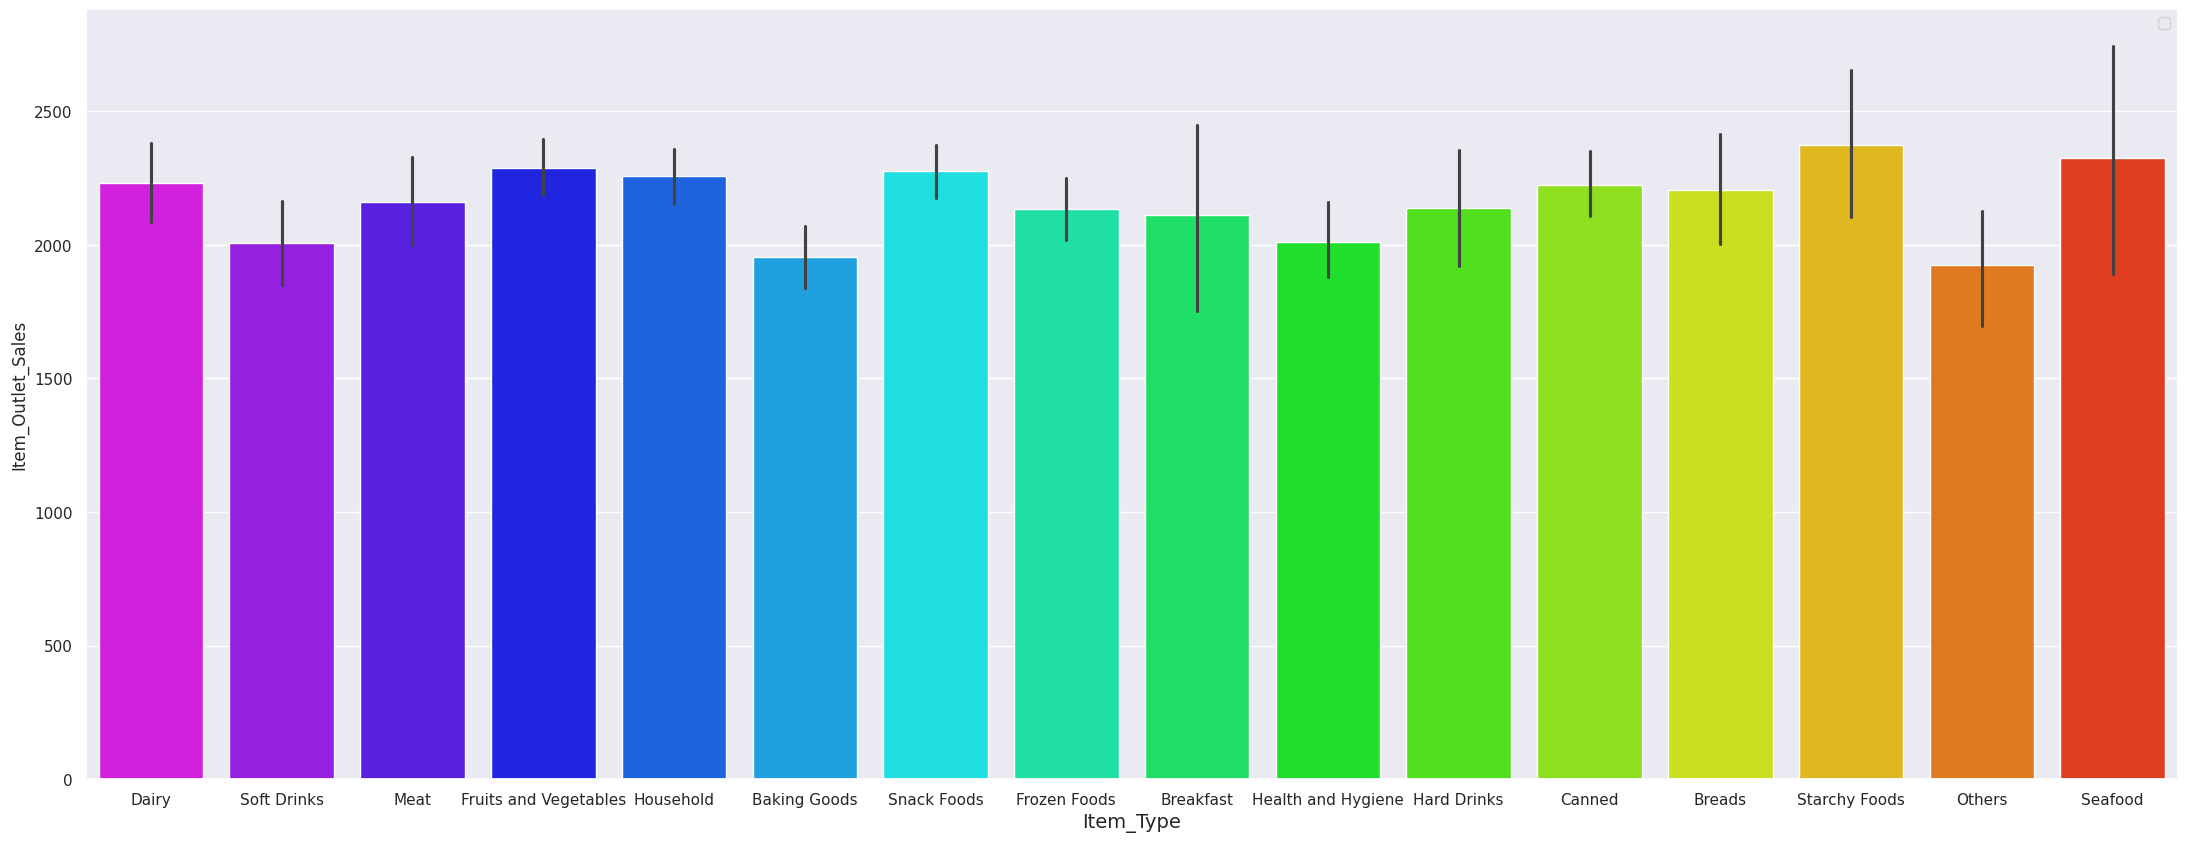

In [100]:
plt.figure(figsize=(27,10))
sns.barplot(data = train ,x="Item_Type",y = target_variable,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize = 14)
plt.legend()
plt.show()

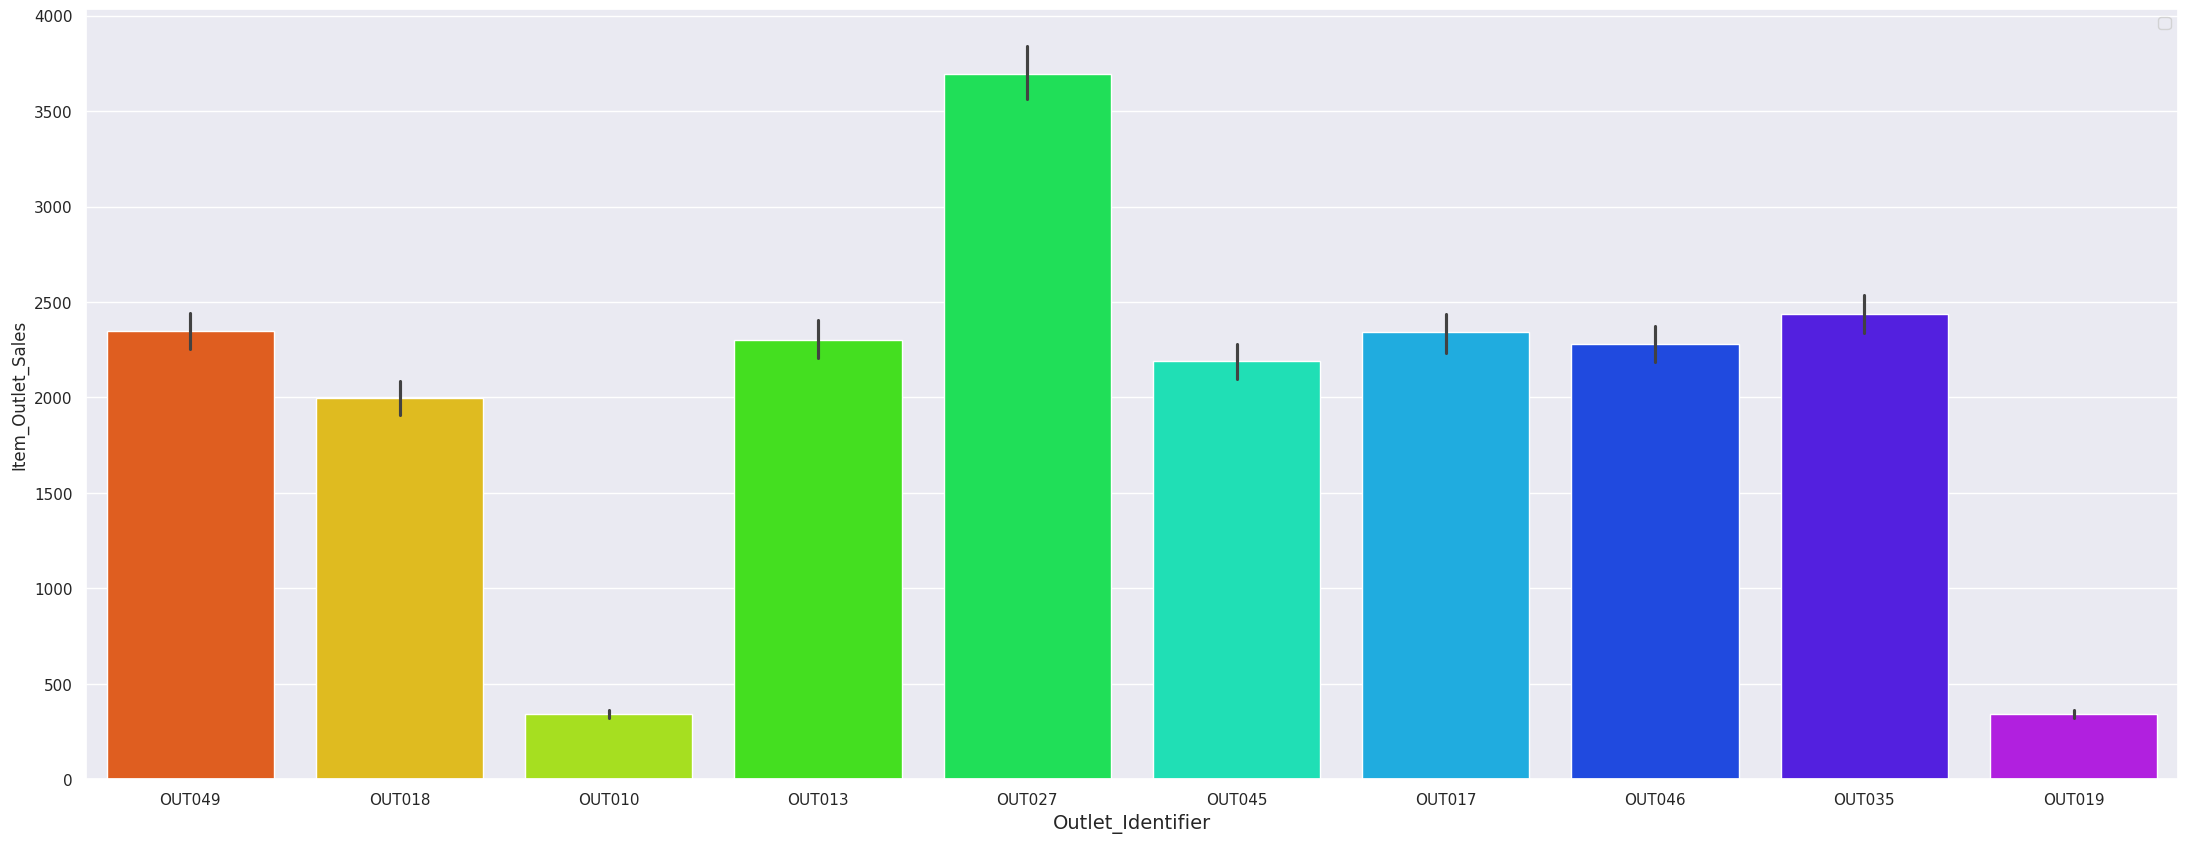

In [101]:
plt.figure(figsize=(27,10))
sns.barplot(data = train ,x="Outlet_Identifier",y = target_variable,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize = 14)
plt.legend()
plt.show()

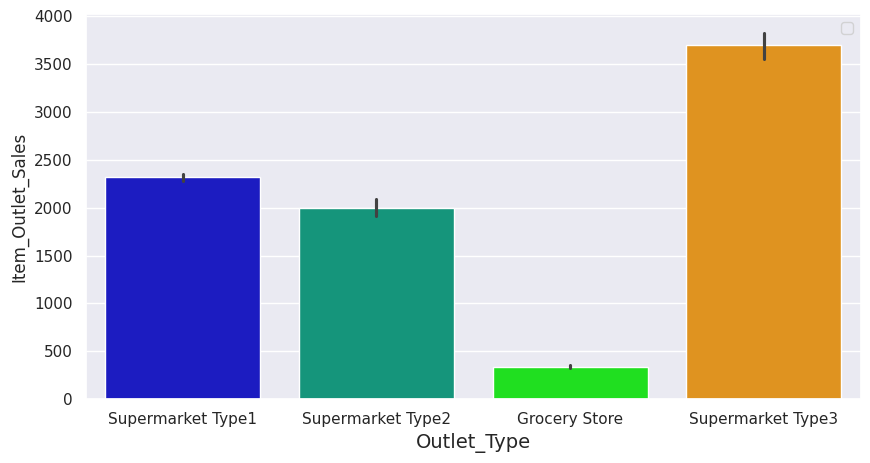

In [102]:
plt.figure(figsize=(10,5))
sns.barplot(data = train ,x="Outlet_Type",y = target_variable,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize = 14)
plt.legend()
plt.show()

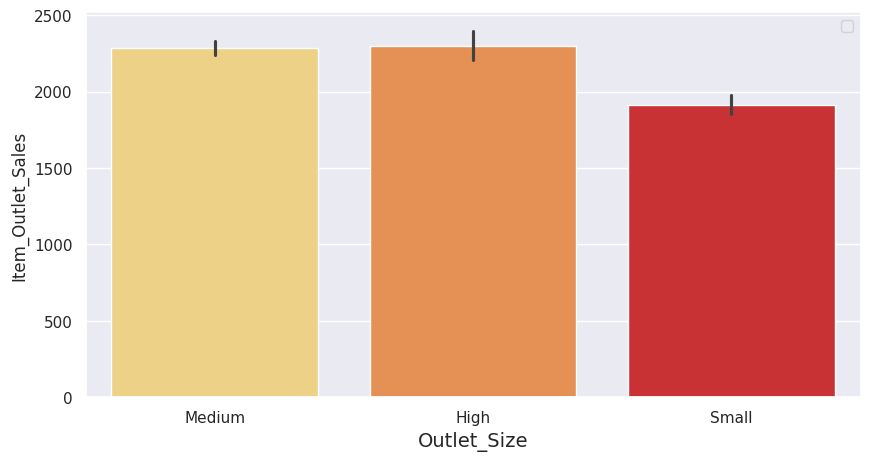

In [103]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Size' ,y = target_variable, data = train ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

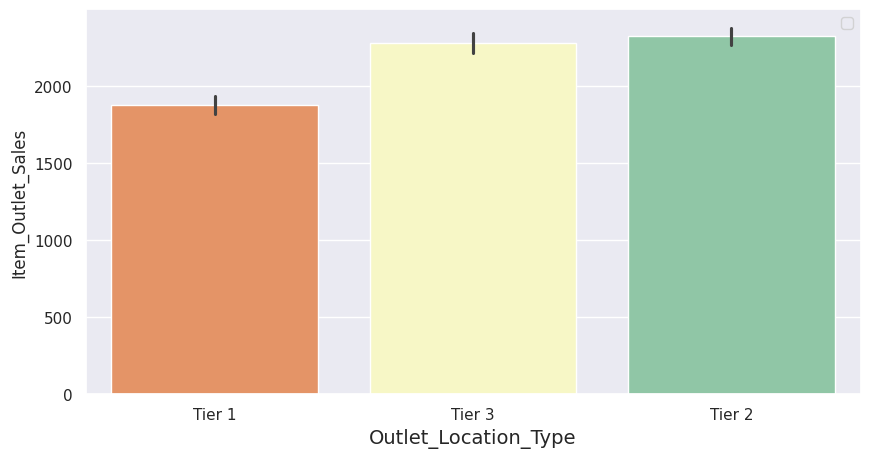

In [104]:
plt.figure(figsize=(10,5))
sns.barplot(x ='Outlet_Location_Type' ,y = target_variable, data=train ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

Correlation Matrix

<Axes: >

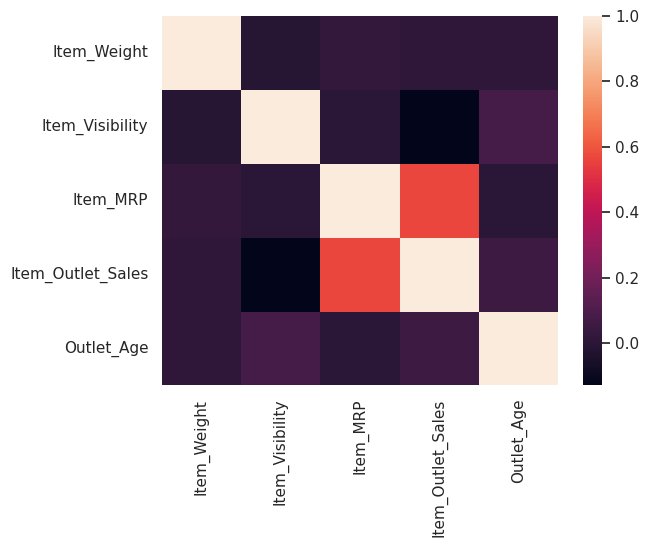

In [105]:
sns.heatmap(train.corr() ,cmap='rocket')

We can see that **Item_Outlet_Sales** is highly correlated with **Item_MRP**.

# **Encoding Categorical Variables :**

## Label Encoding

In [106]:
train['Outlet_Size'] = train['Outlet_Size'].map({'Small'  : 1,
                                                 'Medium' : 2,
                                                 'High'   : 3
                                                 }).astype(int)
test['Outlet_Size'] = test['Outlet_Size'].map({ 'Small' : 1,
                                                'Medium' : 2,
                                                'High' : 3}).astype(int)

In [107]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,3,Tier 3,Supermarket Type1,994.7052,33


In [108]:
#Label Encoder for Ordinate Data

encoding = LabelEncoder()
ordinal_features = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type']

for feature in ordinal_features:
    train[feature] = encoding.fit_transform(train[feature])
    test[feature]  = encoding.fit_transform(test[feature])


In [109]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,2,0,1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2,2,2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,2,0,1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,2,2,0,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,3,2,1,994.7052,33


## One Hot Encoding :



In [110]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(train[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(test[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names_out(cols)
te_oh.columns = OH_encoder.get_feature_names_out(cols)

# One-hot encoding removed index; put it back
tr_oh.index = train.index
te_oh.index = test.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired)
tr_fe = pd.concat([train, tr_oh], axis=1)
te_fe = pd.concat([test, te_oh], axis=1)

In [125]:
tr_oh.head()

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [128]:
# Dropping irrelevant columns

tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Type','Item_Type'],axis=1)

In [129]:
tr_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.30,0,0.016047,249.8092,2,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,2,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,2,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,2,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,3,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0


In [130]:
tr_fe.shape

(8523, 28)

## PreProcessing Data

In [131]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis=1)

In [132]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.30,0,0.016047,249.8092,2,0,21,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,2,2,11,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,2,0,21,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,2,2,22,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,3,2,33,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [133]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [137]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

# **Modeling**



# Machine learning models

![](https://media4.giphy.com/media/4TtTVTmBoXp8txRU0C/200w.webp?cid=ecf05e47hbwccgi1rqz8b91h2vj504ui7e6q02oscy461q42&rid=200w.webp)

First of all we will divide our dataset into two variables `X` as the features we defined earlier and `y` as the `	Item_Outlet_Sales` the target value we want to predict.

**Assumptions:**

* This is a regression problem so we will use Regression methods.

* Train test split will be a 8:2 ratio respectively.

## Models we will use:

* **Linear Regression**
* **Random Forest Regressor**
* **Lasso Regressor**

## The Process of Modeling the Data:

1. Importing the model

2. Fitting the model

3. Predicting Item Outlet Sales

4. Regression metrics

### Score Metrics for Regression:

* **Mean Absolute Error (MAE)**  -  Mean of the absolute value of errors (absolute distance from true value):
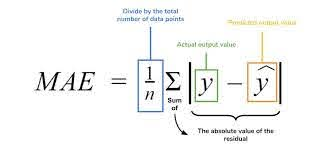

* **Mean Squared Error (MSE)**  -  Mean of the squared value of errors (squared distance from true value):
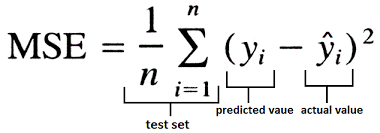

* **R^2 (coefficient of determination)**  -  Regression score function.:
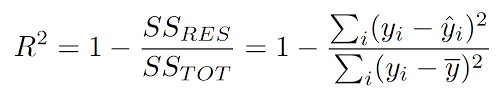

## Linear Regression

![](https://cdn.filestackcontent.com/WCbMsxiSLW2H1SyqunQm)

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications. This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine (more info on [wikipedia](https://en.wikipedia.org/wiki/Linear_regression)).

In [141]:
#model
LR = LinearRegression()

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)

#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

 Mean Absolute Error: 838.19

 Mean Squared Error: 1285793.54

 R^2 Score: 0.5593

LinearRegression() Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression() score: 0.558


In [142]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")

In [154]:
Linear_Regression.head()

,y_test,prediction
4931,1426.1436,2680.270940
4148,1201.7690,2521.511879
7423,1836.2764,2260.187885
4836,2410.8618,2300.373842
944,1549.9824,3067.836528


# Regularized Linear Regression

##Lasso Regression

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces  - more info on [wikipedia.](https://en.wikipedia.org/wiki/Lasso_(statistics))

In [143]:
#model
LS = Lasso(alpha = 0.05)
#fit
LS.fit(X_train,y_train)

#predict
y_predict = LS.predict(X_test)

#score variables
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(LS,Lasso(alpha = 0.05),X,y,5)

 Mean Absolute Error: 838.07

 Mean Squared Error: 1285554.86

 R^2 Score: 0.5594

Lasso(alpha=0.05) Scores:
0.57
0.55
0.55
0.56
0.56
Average Lasso(alpha=0.05) score: 0.5581


In [144]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Lasso_Regressor.to_csv("Lasso Regressor.csv")

In [155]:
Lasso_Regressor.head()

,y_test,prediction
4931,1426.1436,2680.115924
4148,1201.7690,2519.840376
7423,1836.2764,2258.189982
4836,2410.8618,2299.363790
944,1549.9824,3068.155181


## Random Forest :

Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression.
It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [146]:
#model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 1030.27

 Mean Squared Error: 1964025.66

 R^2 Score: 0.3268

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.53
0.52
0.56
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5501


In [148]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")

In [156]:
Random_Forest_Regressor.head()

,y_test,prediction
4931,1426.1436,2184.427420
4148,1201.7690,991.948017
7423,1836.2764,2081.779583
4836,2410.8618,2153.559479
944,1549.9824,3052.300058


## XG Boost

In [149]:
#model
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
#predict
y_predict = xgb_reg.predict(X_test)

#score variables
xgb_reg_MAE = round(MAE(y_test, y_predict),2)
xgb_reg_MSE = round(MSE(y_test, y_predict),2)
xgb_reg_R_2 = round(R2(y_test, y_predict),4)
xgb_reg_CS  = round(CVS(xgb_reg, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {xgb_reg_MAE}\n")
print(f" Mean Squared Error: {xgb_reg_MSE}\n")
print(f" R^2 Score: {xgb_reg_R_2}\n")
cross_val(xgb_reg,XGBRegressor(),X,y,5)

 Mean Absolute Error: 879.2

 Mean Squared Error: 1558079.52

 R^2 Score: 0.466

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) Scores:
0.54
0.5
0.48
0.52
0.52
Average XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
            

In [150]:
XG_Boost_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
XG_Boost_Regressor.to_csv("XG Boost Regressor.csv")

In [157]:
XG_Boost_Regressor.head()

,y_test,prediction
4931,1426.1436,2010.201294
4148,1201.7690,1442.168945
7423,1836.2764,2712.163574
4836,2410.8618,1125.518311
944,1549.9824,2617.791992


# Conclusion

In [152]:
MAE= [LR_MAE,RFR_MAE,LS_MAE,xgb_reg_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE,xgb_reg_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2,xgb_reg_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS,xgb_reg_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor","XG Boost Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
2,Lasso Regressor,838.07,1285554.86,0.5594,0.5581
0,Linear Regression,838.19,1285793.54,0.5593,0.5580
3,XG Boost Regressor,879.20,1558079.52,0.4660,0.5113
1,Random Forest Regressor,1030.27,1964025.66,0.3268,0.5920


## Summary

* `Item_MRP`  optimizes Maximum Outlet sales (positive correlation with the target).
* Linear Regression	and Lasso Regressor have the best perfomance in most categories.

* Also XG Boost Regressor have better performance for some categories.

* Only a third of the observed variation can be explained by the model's inputs of Random Forest Regressor, therefore it's performance is not optimal even though his cross validation is the highest.
* For better peformance this models need hyper parameter tuning. e.g. Grid Search